# NIFTY50 STOCKS 
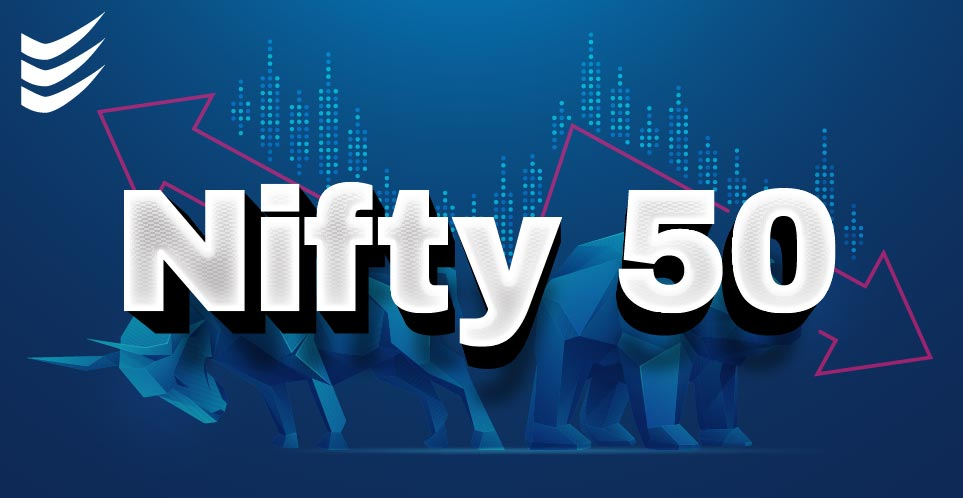
## Introduction:
The goal of this project is to analyze the Nifty 50 stock dataset and gain insights into the factors influencing stock price changes. The analysis includes exploratory data analysis (EDA) and visualization techniques to uncover patterns, trends, and relationships within the dataset. By understanding the factors that impact stock prices, we aim to identify potential investment opportunities and make informed decisions.

### Process:
**Data Loading and Initial Exploration**: The project begins with loading the Nifty 50 stock dataset and performing initial exploration. This involves examining the dataset's structure, checking column names, and gaining an understanding of the available variables.

**Univariate Analysis**: Univariate analysis helps us understand the distribution and characteristics of individual variables. Histograms, line graphs, and bar plots are plotted to visualize and analyze variables like stock prices, volume, turnover, and percentage changes over different time periods.

**Bivariate Analysis**: Bivariate analysis explores the relationships between pairs of variables. Scatter plots are used to observe the relationship between two variables, such as stock prices and volume. Correlation analysis is performed to quantify the strength and direction of relationships using a correlation matrix.

**Heatmap Visualization**: To gain a comprehensive view of the relationships between variables, a heatmap is plotted based on the correlation matrix. This visualization provides a clear overview of the interdependencies between different variables.

**Stock Performance Analysis**: The project includes ranking the stocks based on their percentage change in price over a specified time period. The top-ranked stocks are identified, and their performance is further analyzed to understand the factors influencing their price changes.

**Volatility Analysis**: The next step is to analyze the volatility of the stocks. Volatility is calculated using the difference between high and low prices. The relationship between volatility and other variables such as volume, turnover, or price changes can be explored to identify potential connections.

The project continues with additional analyses and explorations based on the specific goals and requirements.

Through this project, we aim to gain insights into the factors influencing stock price changes and identify profitable opportunities within the Nifty 50 stock dataset. By leveraging EDA techniques and visualizations, we can make informed investment decisions and develop a deeper understanding of the dynamics of the stock market.

Remember, while the analysis might provide insights into the behavior of stocks, it is essential to complement this with other market knowledge. The stock market is influenced by various external factors like market news, economic policies, global events, etc., which might not be captured in the dataset.
 
---

## Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nifty50 = pd.read_csv('NIFTY50.csv')
print(nifty50.head())
print(nifty50.tail())

       Symbol       Open       High        Low        LTP    Chng  % Chng  \
0  ADANIPORTS        750        766     713.25        715  -47.45   -6.22   
1  ASIANPAINT   3,101.00   3,167.35   3,091.00   3,138.00   -6.25   -0.20   
2    AXISBANK        669      674.9     660.45        661  -18.90   -2.78   
3  BAJAJ-AUTO   3,370.00   3,383.50   3,320.00   3,335.00  -56.70   -1.67   
4  BAJAJFINSV  17,200.00  17,237.20  16,610.00  16,684.00 -684.85   -3.94   

   Volume (lacs) Turnover (crs.)      52w H     52w L  365 d % chng  \
0          72.20          532.63        901     384.4         79.22   
1          10.29          322.53   3,505.00  2,117.15         45.66   
2         102.53             684      866.9     568.4         10.19   
3           3.42          114.59   4,361.40  3,041.00          9.30   
4           3.42          576.79  19,325.00  8,273.70         91.38   

   30 d % chng  
0        -4.65  
1         5.66  
2       -21.49  
3       -12.05  
4        -9.10  
        

In [3]:
print(nifty50.shape)

(50, 13)


In [4]:
print(nifty50.info())
print(nifty50.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB
None
             Chng     % Chng  Volume (lacs)  365 d % chng  30 d % chng
count   50.000000  50.000000      50.000000     50.000000    50.000000
mean   -

Before we can start our analysis, we can see that some of the columns are of the `object` datatype and contain `,`, we will clean these columns and change their type to `float`

In [5]:
nifty50[['Open', 'High', 'Low', 'LTP', 'Turnover (crs.)', '52w H', '52w L']] = nifty50[['Open', 'High', 'Low', 'LTP', 'Turnover (crs.)', '52w H', '52w L']].apply(lambda x: x.str.replace(',', '')).astype(float)

In [6]:
nifty50

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,-0.20,10.29,322.53,3505.00,2117.15,45.66,5.66
2,AXISBANK,669.00,674.90,660.45,661.00,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
3,BAJAJ-AUTO,3370.00,3383.50,3320.00,3335.00,-56.70,-1.67,3.42,114.59,4361.40,3041.00,9.30,-12.05
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.70,91.38,-9.10
5,BAJFINANCE,7021.00,7047.90,6775.00,6780.00,-345.80,-4.85,16.89,1161.63,8050.00,4362.00,44.57,-13.69
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,-3.83,111.43,830.06,781.80,454.11,58.55,5.70
7,BPCL,397.15,397.20,375.00,377.40,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
8,BRITANNIA,3560.00,3635.10,3533.95,3566.60,-6.80,-0.19,3.73,133.23,4153.00,3317.30,0.30,-3.42
9,CIPLA,892.00,976.05,890.65,965.00,65.05,7.23,144.59,1380.90,1005.00,726.50,31.89,6.34


In [7]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float64
 2   High             50 non-null     float64
 3   Low              50 non-null     float64
 4   LTP              50 non-null     float64
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float64
 9   52w H            50 non-null     float64
 10  52w L            50 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.2+ KB


In [8]:
nifty50.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng'],
      dtype='object')

The dataset contains the following columns, which we will analysing

- `Symbol` : Name of the stock
- `Open` : the price at which the stock opened in the market.
- `High` : the highest price at which a stock traded during the course of the trading day
- `Low` : the lowest price at which a stock trades over the course of a trading day.
- `LTP` : the last price at which the trade occurred
- `Chng`: the amount by which the stock changed from the previous day close
- `% Chng` : percentage of change from previous day close
- `Volume (lacs)` : traded volume in lacs
- `Turnover` :  turnover of the stock in crores
- `52w H`: The highest stock price in 52 week period
- `52w L`: The lowest stock price in 52 week period
- `365 d % chng` : Stock price percentage change from one year
- `30 d % chng` : Stock price percentage change from last 30days

We can change some column names of the dataset, so they are easier to understand, and convert all to snakecase

In [9]:
new_columns = ['symbol', 'open', 'high', 'low', 'ltp', 'chng', '%chng', 'volume_lacs', 'turnover_cr', '52week_high', '52week_low', '%change_365days', '%change_30days']

nifty50.columns = new_columns
nifty50.columns

Index(['symbol', 'open', 'high', 'low', 'ltp', 'chng', '%chng', 'volume_lacs',
       'turnover_cr', '52week_high', '52week_low', '%change_365days',
       '%change_30days'],
      dtype='object')

Let's check if the dataset has any missing or null values

In [10]:
nifty50.isnull().sum()

symbol             0
open               0
high               0
low                0
ltp                0
chng               0
%chng              0
volume_lacs        0
turnover_cr        0
52week_high        0
52week_low         0
%change_365days    0
%change_30days     0
dtype: int64

No null values are found, so now that we are done with the basic data cleaning process, we can move forward to the EDA and Visualization part

---

# EDA and Visualization
## Univariate Analysis

In [11]:
nifty50['open'].describe()

count       50.000000
mean      2985.739000
std       5024.412163
min        125.600000
25%        673.000000
50%       1155.950000
75%       2760.262500
max      26450.000000
Name: open, dtype: float64

In [12]:
nifty50['high'].describe()

count       50.000000
mean      3017.261000
std       5057.739037
min        125.600000
25%        678.425000
50%       1156.750000
75%       2789.425000
max      26539.900000
Name: high, dtype: float64

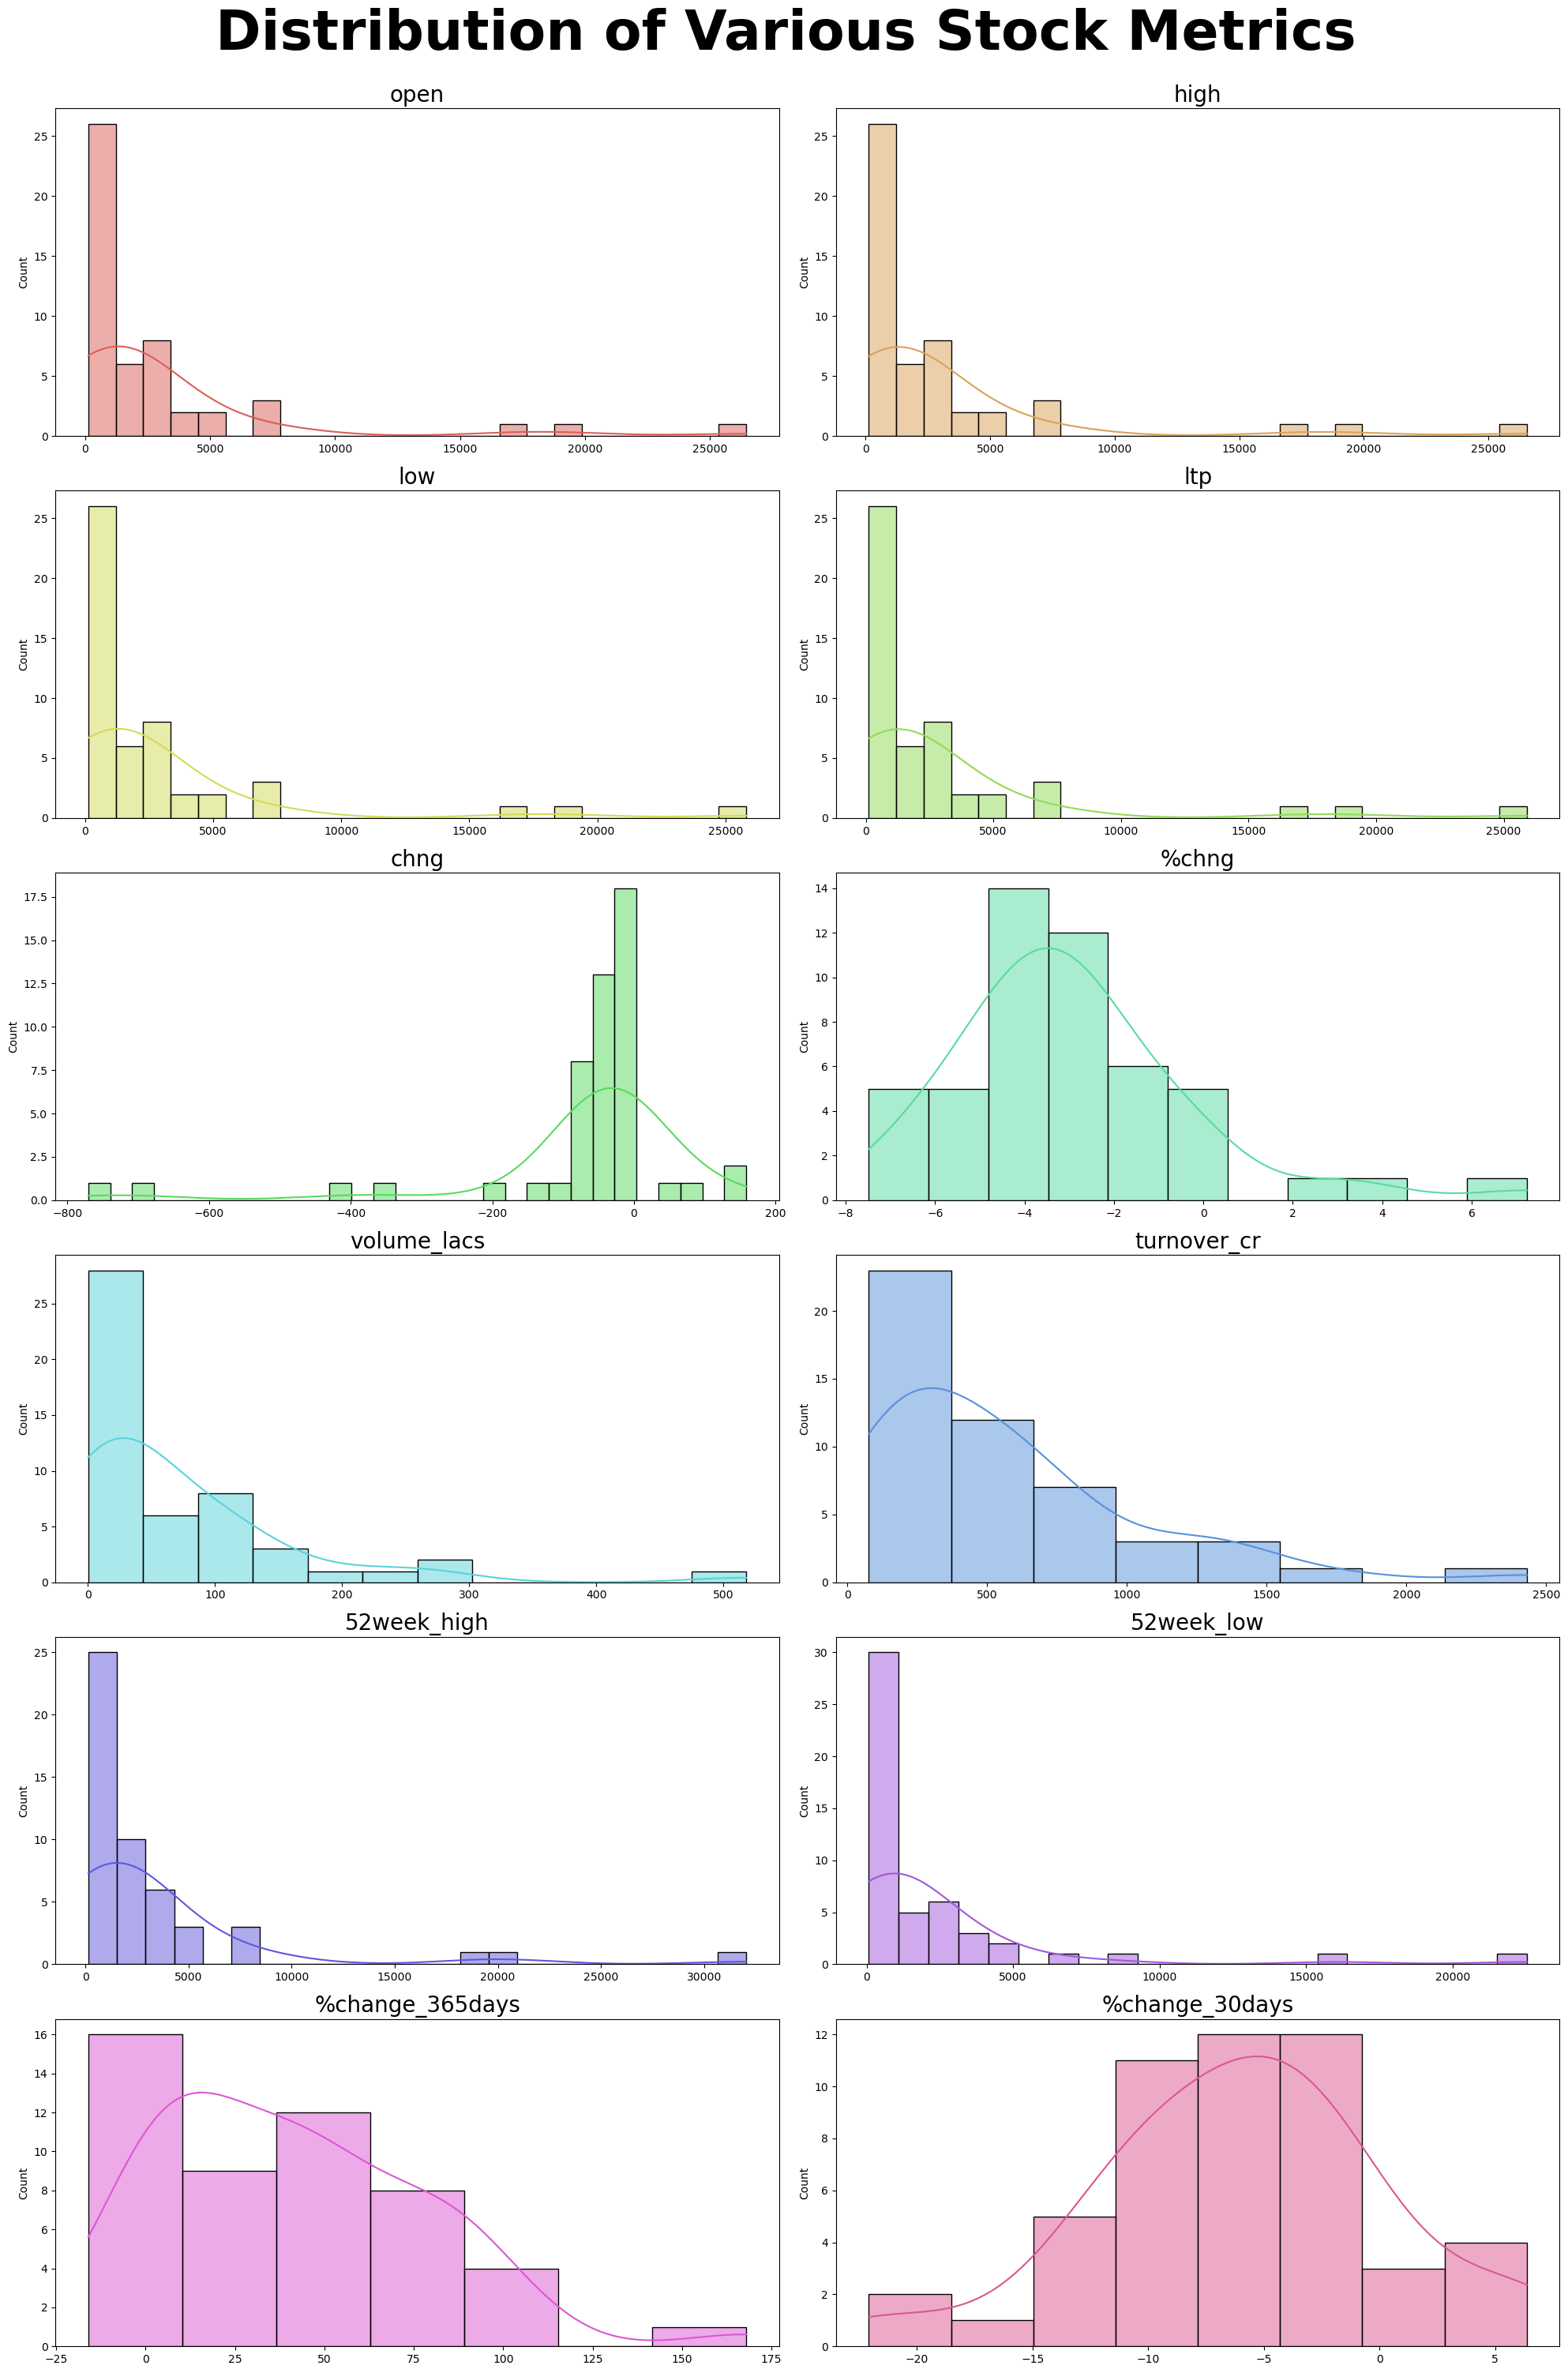

In [13]:
columns_hist = ['open', 'high', 'low', 'ltp', 'chng', '%chng', 'volume_lacs', 'turnover_cr', '52week_high', '52week_low', '%change_365days', '%change_30days']
ncols = 2
nrows = int(len(columns_hist)/ncols)

plt.figure(figsize = (20,30))
palette = sns.color_palette("hls", len(columns_hist))

for n, column, color in zip(range(1, len(columns_hist) + 1), columns_hist, palette):
    plt.subplot(nrows, ncols, n)
    sns.histplot(nifty50[column], kde = True, color = color)
    plt.title(column, fontsize = 20)
    plt.xlabel('')
    
plt.suptitle('Distribution of Various Stock Metrics', fontsize = 50, weight = 'bold', x = 0.5, y = 1.00)
plt.tight_layout()
plt.show()

From the histograms, above we can observe that some of our variables are skewed, :

**open, high, low, ltp, 52week_low and high, volume_lacs, turnover are all right skewed, and chng is left skewed**

*Implying the presence of some outliers*

### Now lets identify the outliers and find out the skewness




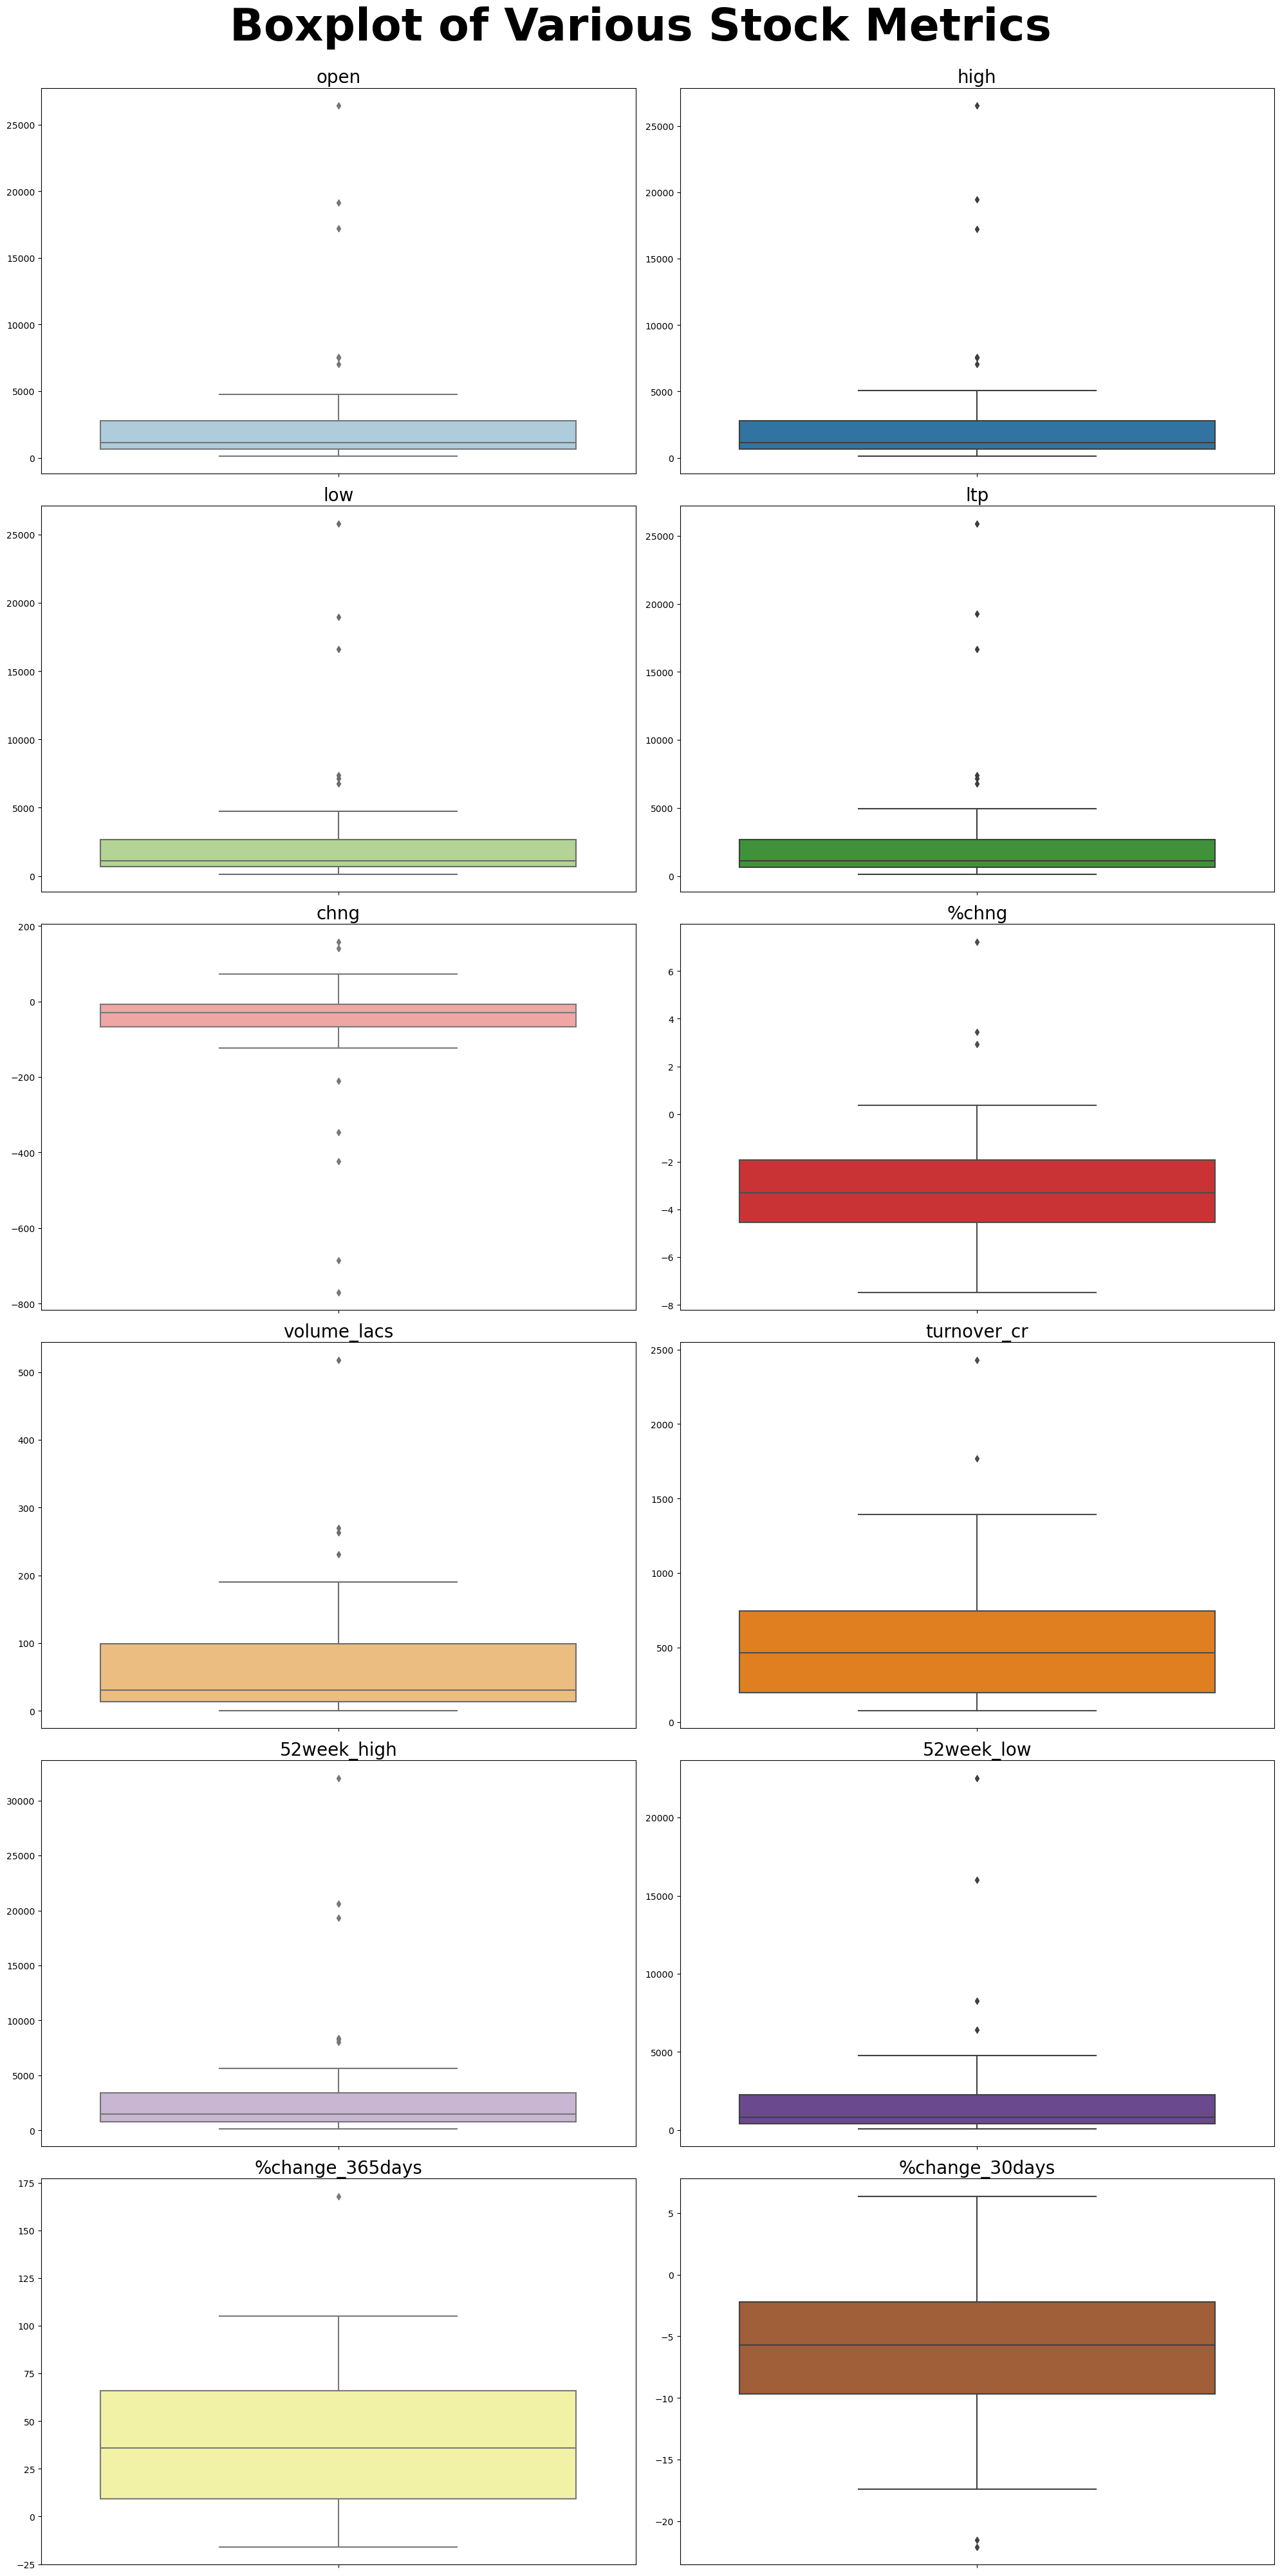

In [14]:
columns_box = ['open', 'high', 'low', 'ltp', 'chng', '%chng', 'volume_lacs', 'turnover_cr', '52week_high', '52week_low', '%change_365days', '%change_30days']
ncols = 2
nrows = int(len(columns_box)/ncols)
palette_b = sns.color_palette("Paired", len(columns_box))
plt.figure(figsize = (20,40))
for n, column, color in zip(range(1, len(columns_box) + 1), columns_box, palette_b):
    plt.subplot(nrows, ncols, n)
    sns.boxplot(y = nifty50[column], color = color)
    plt.title(column, fontsize = 20)
    plt.xlabel('')
    plt.ylabel('')
    
plt.suptitle('Boxplot of Various Stock Metrics', fontsize = 50, weight = 'bold', x = 0.5, y = 1.00)
plt.tight_layout()
plt.show()

We can see that many of the variables/columns, have multiple outliers, something we should definetly investigate later on

**Now let's calculate the skewness**

In [15]:
from scipy.stats import skew, kurtosis

for column in columns_hist:
    print(f"{column}:")
    print(f"Skewness: {skew(nifty50[column])}")
    print("\n")


open:
Skewness: 3.234718531077421


high:
Skewness: 3.217958384292084


low:
Skewness: 3.2372234343618747


ltp:
Skewness: 3.22659711193808


chng:
Skewness: -2.905193237040021


%chng:
Skewness: 1.3726042229252673


volume_lacs:
Skewness: 2.6752509356771075


turnover_cr:
Skewness: 1.6142340483818287


52week_high:
Skewness: 3.385372506661243


52week_low:
Skewness: 3.7038918474051328


%change_365days:
Skewness: 0.8761535435820333


%change_30days:
Skewness: -0.2380886070155209




The skewness values provide some valuable insights into the distribution of the data. Here's what we can infer from these values:

- `Open, High, Low, LTP, 52-week High, 52-week Low`: These columns all have high positive skewness values. This suggests that the distribution of these columns is right-skewed than a normal distribution. The data may have many smaller values and a few extremely large ones.

- `Chng`: This column has a high negative skewness. This suggests that the distribution of this column is left-skewed .suggesting The data may have many larger values and a few extremely small ones.

- `% Chng, Volume (lacs), Turnover (cr.)`: These columns have positive skewness, though not as extreme as the other columns. This suggests these columns might be slightly right-skewed.

- `Change in 365 days, % Change in 30 days`: These columns have relatively low skewness. This suggests that their distributions might be closer to a normal distribution than the other columns. The `"% Change in 30 days"` column even has a slightly negative skewness, suggesting that it might be slightly left-skewed.

From the above analysis, it's evident that most of the numerical data in the dataset is not normally distributed. and we might need to transform it later

## Bivariate Analysis
Let's start by analyzing the correlation between the variables, and then design a correlation matrix

In [16]:
nifty50.corr()

/var/folders/xf/djdr51tx47d1mk2ynq3k0hl80000gn/T/ipykernel_25970/2632244021.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nifty50.corr()


,open,high,low,ltp,chng,%chng,volume_lacs,turnover_cr,52week_high,52week_low,%change_365days,%change_30days
open,1.000000,0.999933,0.999911,0.999801,-0.711266,0.137551,-0.337150,-0.154185,0.998134,0.976253,-0.145522,0.103614
high,0.999933,1.000000,0.999953,0.999934,-0.704402,0.145005,-0.338299,-0.153951,0.997879,0.976641,-0.147258,0.107515
low,0.999911,0.999953,1.000000,0.999967,-0.702262,0.144788,-0.337562,-0.156095,0.997875,0.977532,-0.148293,0.107065
ltp,0.999801,0.999934,0.999967,1.000000,-0.697198,0.149876,-0.338124,-0.156173,0.997577,0.977705,-0.149456,0.109937
chng,-0.711266,-0.704402,-0.702262,-0.697198,1.000000,0.314513,0.208215,0.020564,-0.724202,-0.632414,-0.038896,0.149898
%chng,0.137551,0.145005,0.144788,0.149876,0.314513,1.000000,-0.273596,-0.098820,0.135535,0.169505,-0.393705,0.560149
volume_lacs,-0.337150,-0.338299,-0.337562,-0.338124,0.208215,-0.273596,1.000000,0.623093,-0.335760,-0.328567,0.490092,-0.245722
turnover_cr,-0.154185,-0.153951,-0.156095,-0.156173,0.020564,-0.098820,0.623093,1.000000,-0.158218,-0.179158,0.361395,-0.212421
52week_high,0.998134,0.997879,0.997875,0.997577,-0.724202,0.135535,-0.335760,-0.158218,1.000000,0.979263,-0.155586,0.089951
52week_low,0.976253,0.976641,0.977532,0.977705,-0.632414,0.169505,-0.328567,-0.179158,0.979263,1.000000,-0.238595,0.117266


From looking at the correlation matrix there are certain analysis that we can make:

In [17]:
nifty50['volume_lacs'].corr(nifty50['turnover_cr'])

0.6230928075796587

**High volume and high turnover**: The correlation between `'volume_lacs'` and `'turnover_cr'` is 0.623093. This suggests a strong positive relationship, which means that stocks with a high volume of trading also tend to have a high turnover. This might be expected as both variables reflect the level of trading activity. High turnover and volume can sometimes suggest volatility, although they don't necessarily indicate whether a stock's price will increase or decrease.

In [18]:
nifty50['%change_30days'].corr(nifty50['%change_365days'])

-0.08357162917139277

**30-day and 365-day percent change**: The correlation between '%change_30days' and '%change_365days' is -0.083572, which is close to zero. This suggests that there is no strong linear relationship between a stock's performance over the past 30 days and its performance over the past year. In other words, a stock that performs well over a 30-day period does not necessarily perform well over a 365-day period, and vice versa.

**Open, High, Low, and LTP**: The 'open', 'high', 'low', and 'ltp' variables are very strongly correlated with each other, with correlation coefficients close to 1. This is expected, as these prices over a single day of trading are usually quite close to each other.

**Chng and Open/High/Low/LTP**: There is a strong negative correlation between 'chng' and 'open', 'high', 'low', 'ltp'. This suggests that when the opening, highest, lowest, and last traded prices are high, the change in price from the previous trading day is likely to be negative. This could possibly be an indication of market correction happening after a day of high prices.

**%chng and Volume**: The correlation between '%chng' and 'volume_lacs' is -0.273596, suggesting a weak negative relationship. This suggests that stocks with higher trading volumes may not necessarily have higher percentage price changes.

**%change_365days and Volume**: There is a positive correlation (0.490092) between the volume of stocks and the percentage change in the last 365 days. This could indicate that stocks with more significant price changes over the past year also had higher trading volumes, possibly due to increased investor interest.

Now, lets plot a heatmap

## HeatMap

/var/folders/xf/djdr51tx47d1mk2ynq3k0hl80000gn/T/ipykernel_25970/58277011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nifty50.corr()


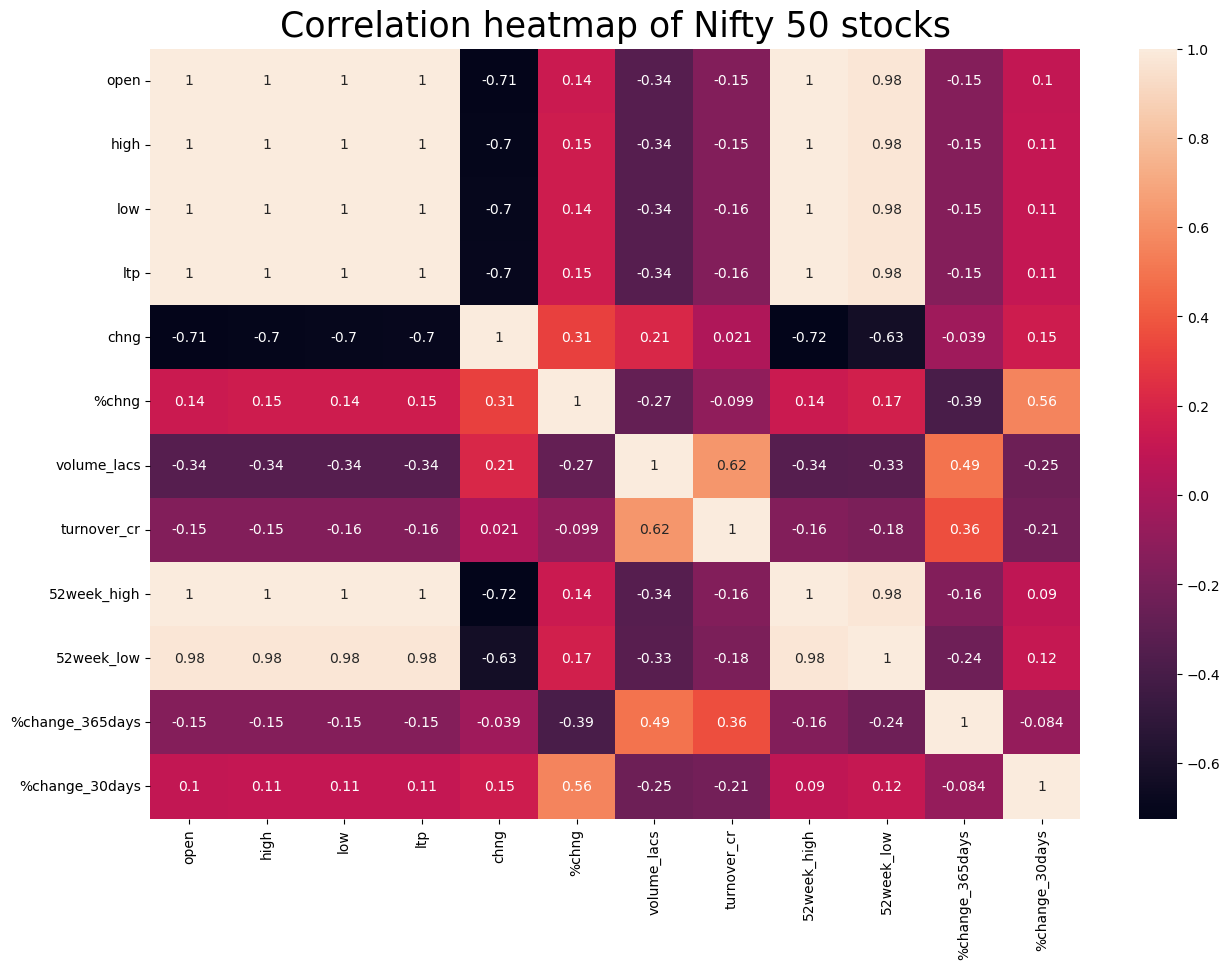

In [19]:
plt.figure(figsize = (15, 10))
correlation_matrix = nifty50.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation heatmap of Nifty 50 stocks", fontsize = 25, y = 1.005)
plt.show()


## Scatterplots

### Volume_lacs vs Turnover_cr
In the correlation matrix, we found that volume of a stock traded and the turnover have a positive correlation, let's explore it further

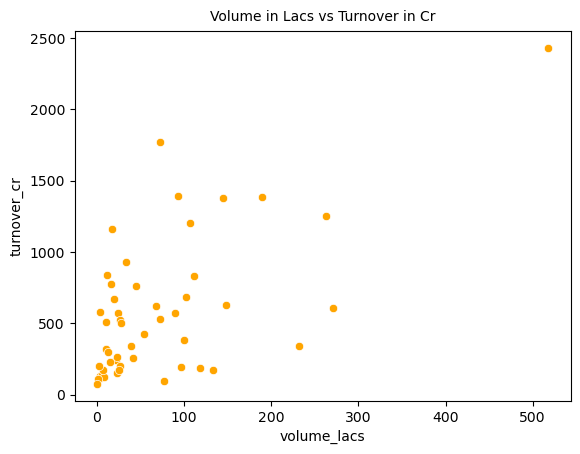

In [20]:
sns.scatterplot(data = nifty50, x = 'volume_lacs', y = 'turnover_cr', color = 'orange')
plt.title('Volume in Lacs vs Turnover in Cr', y = 1.005, fontsize = 10)
plt.show()

### %change_30days' vs '%change_365days

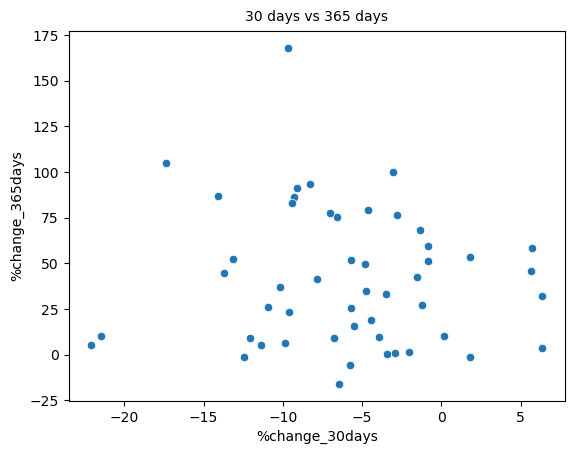

In [21]:
sns.scatterplot(data = nifty50, x = '%change_30days', y = '%change_365days')
plt.title('30 days vs 365 days', y = 1.005, fontsize = 10)
plt.show()

### 'volume_lacs' vs '%change_365days'

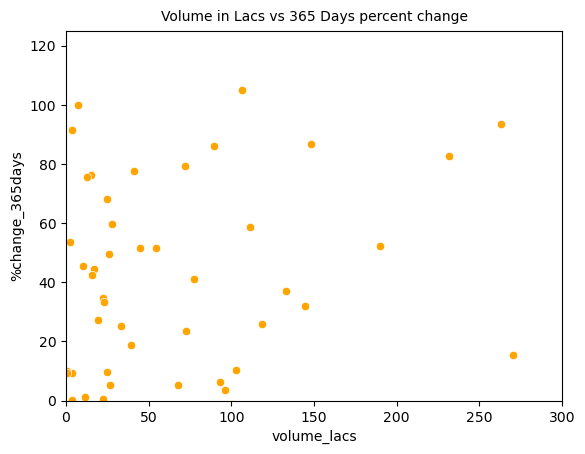

In [22]:
sns.scatterplot(data = nifty50, x = 'volume_lacs', y = '%change_365days', color = 'orange')
plt.title('Volume in Lacs vs 365 Days percent change', y = 1.005, fontsize = 10)
plt.xlim(0, 300)
plt.ylim(0, 125)
plt.show()

## Pairplot

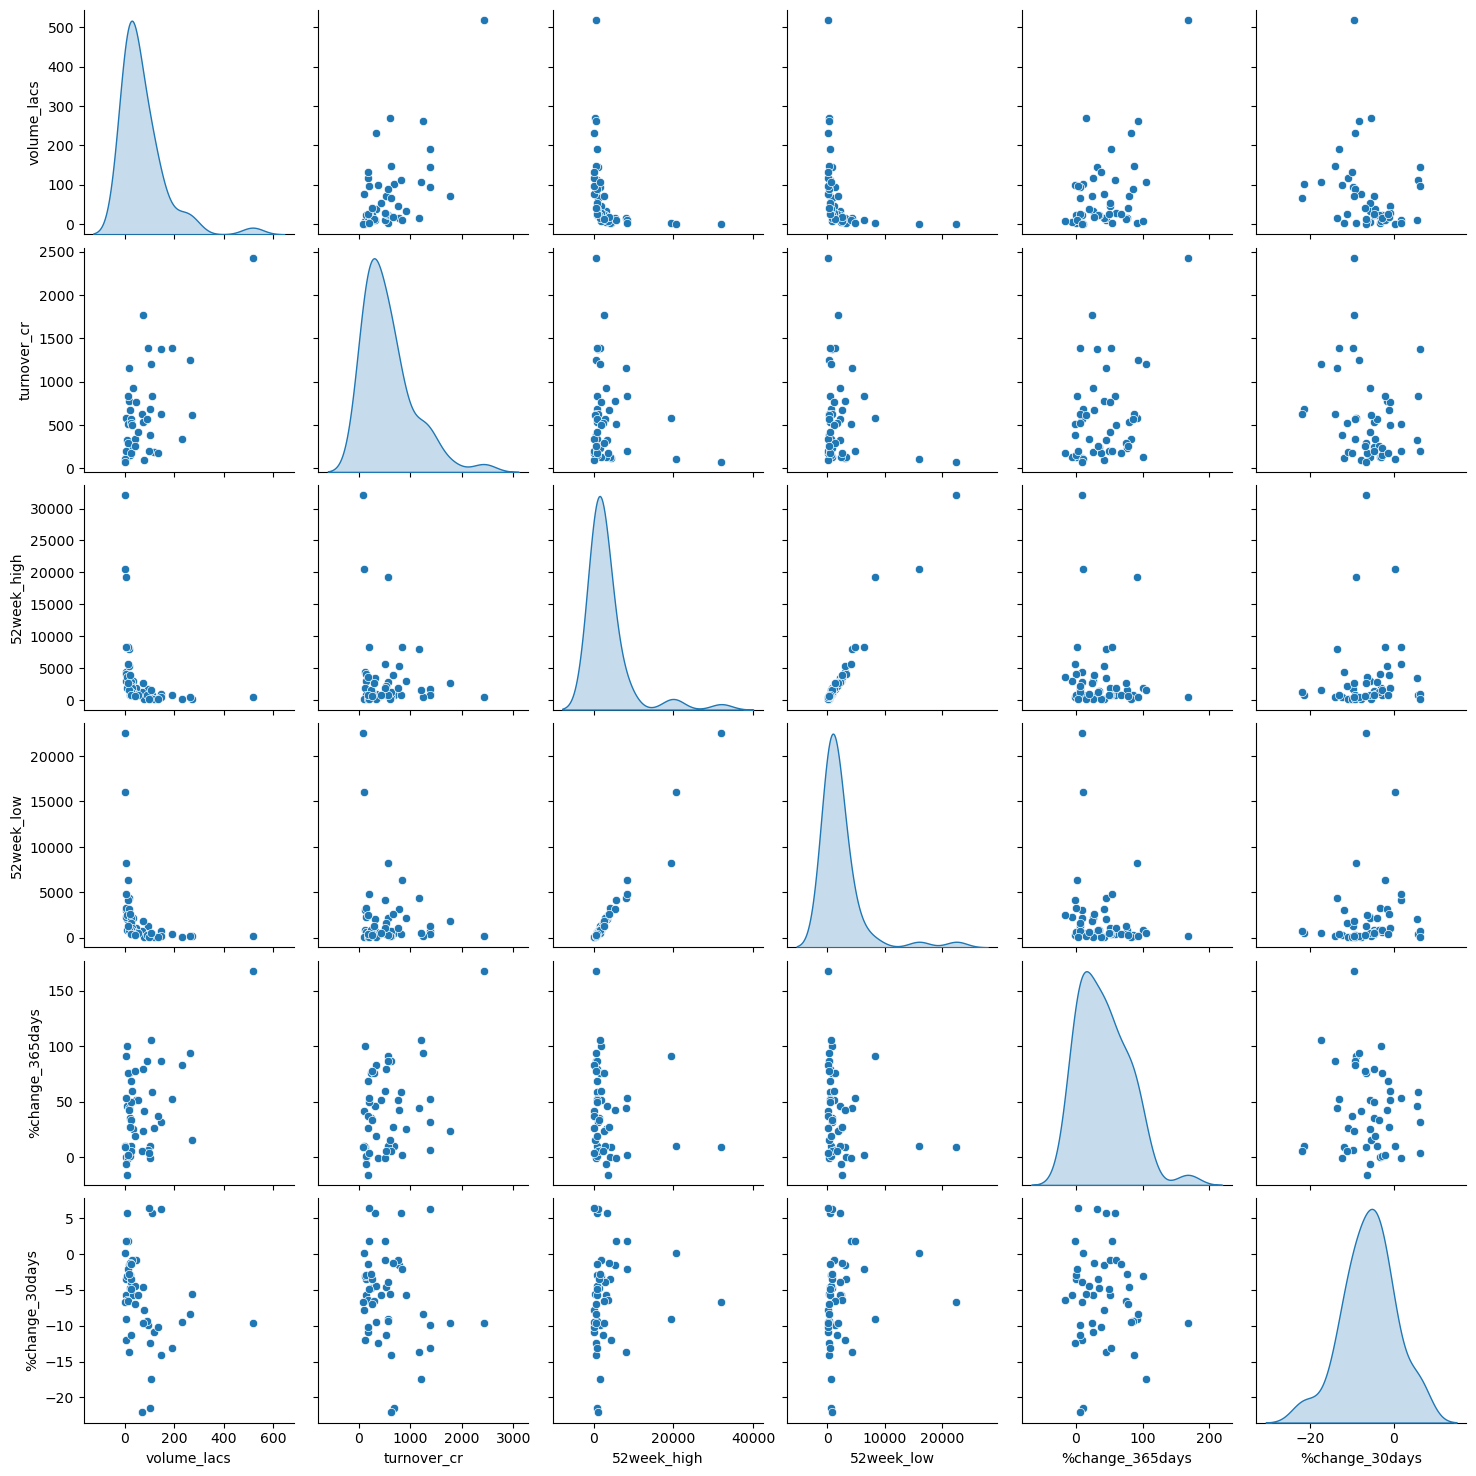

In [23]:
columns_to_plot1 = ['volume_lacs', 'turnover_cr', '52week_high', '52week_low', '%change_365days', '%change_30days']
sns.pairplot(nifty50[columns_to_plot1], diag_kind = 'kde')
plt.show()

## Barplots
now let's identify the change in stock price for the different time frames
### 30 Days

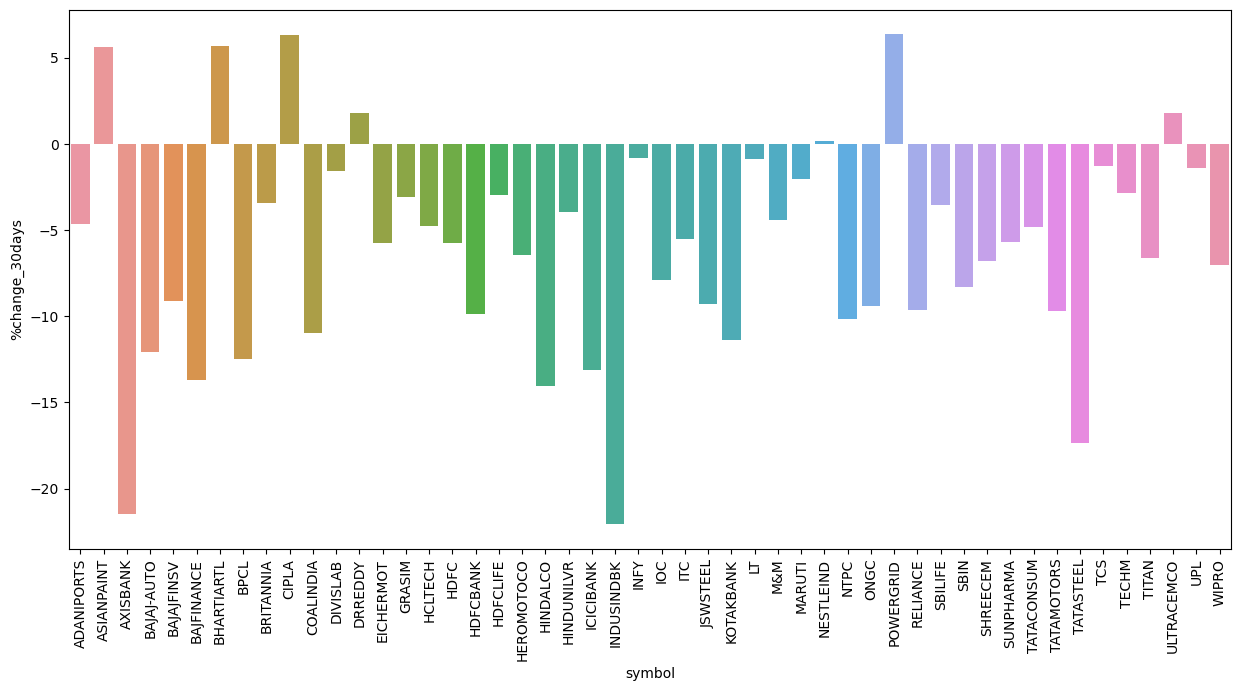

In [24]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data = nifty50, x = 'symbol', y = '%change_30days')
plt.show()

From looking at the bar graph, we can observe that a majority of the NIFTY50 stocks, had negative returns for the 30 day period, implying that for profitable returns, the investment period for NIFTY 50 stocks should be greater than 1 month.

### 365 Days

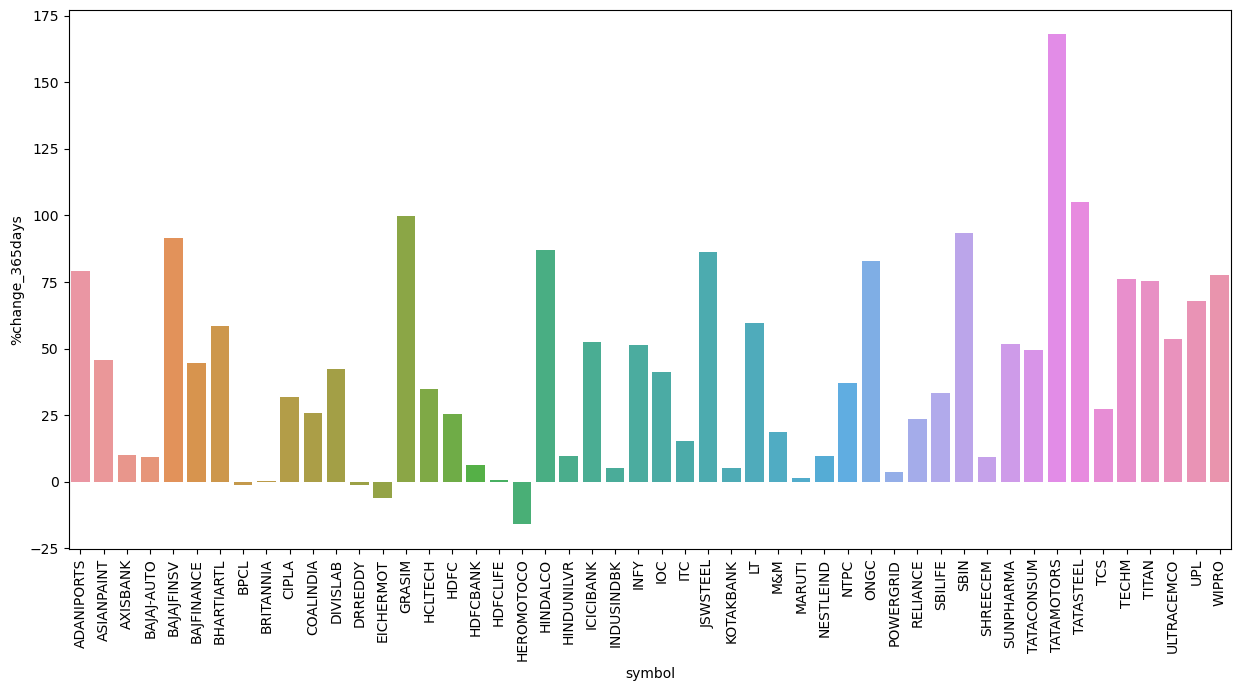

In [25]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data = nifty50, x = 'symbol', y = '%change_365days')
plt.show()

In contrast to the 30 days period, NIFTY 50 stocks had a positive change and were more profitable, some to the extent of even giving more than 100% returns

Let's further explore this, and delve deeper into the individual stock performances

In [26]:
nifty50_ranked = nifty50.copy()
nifty50_ranked['rank'] = nifty50_ranked['%change_365days'].rank(ascending = False)
nifty50_ranked = nifty50_ranked.sort_values(by = 'rank')
rankings = nifty50_ranked[['symbol', '%change_365days', 'rank']]
print(rankings)

        symbol  %change_365days  rank
42  TATAMOTORS           167.95   1.0
43   TATASTEEL           105.13   2.0
14      GRASIM            99.95   3.0
38        SBIN            93.42   4.0
4   BAJAJFINSV            91.38   5.0
20    HINDALCO            86.93   6.0
27    JSWSTEEL            86.25   7.0
34        ONGC            82.86   8.0
0   ADANIPORTS            79.22   9.0
49       WIPRO            77.51  10.0
45       TECHM            76.17  11.0
46       TITAN            75.45  12.0
48         UPL            68.06  13.0
29          LT            59.59  14.0
6   BHARTIARTL            58.55  15.0
47  ULTRACEMCO            53.50  16.0
22   ICICIBANK            52.41  17.0
40   SUNPHARMA            51.57  18.0
24        INFY            51.44  19.0
41  TATACONSUM            49.55  20.0
1   ASIANPAINT            45.66  21.0
5   BAJFINANCE            44.57  22.0
11    DIVISLAB            42.39  23.0
25         IOC            41.28  24.0
33        NTPC            36.93  25.0
15     HCLTE

In [27]:
print(nifty50_ranked[nifty50_ranked['rank'] <= 5.0 ])

        symbol      open      high       low       ltp    chng  %chng  \
42  TATAMOTORS    486.00    486.75    458.00    459.40  -33.35  -6.77   
43   TATASTEEL   1157.90   1159.50   1106.25   1110.25  -63.40  -5.40   
14      GRASIM   1757.30   1757.85   1679.00   1685.80  -80.95  -4.58   
38        SBIN    486.25    487.90    467.10    470.00  -20.55  -4.19   
4   BAJAJFINSV  17200.00  17237.20  16610.00  16684.00 -684.85  -3.94   

    volume_lacs  turnover_cr  52week_high  52week_low  %change_365days  \
42       517.88      2430.36        536.7      156.70           167.95   
43       106.46      1200.79       1534.5      539.50           105.13   
14         7.48       127.84       1893.0      840.05            99.95   
38       263.06      1249.55        542.3      240.15            93.42   
4          3.42       576.79      19325.0     8273.70            91.38   

    %change_30days  rank  
42           -9.68   1.0  
43          -17.37   2.0  
14           -3.08   3.0  
38      

These are the 5 Nifty stocks, which had the most positive returns over a 1 year period:
- **TATAMOTORS** :  Rank 1 - 167.95 %change
- **TATASTEEL** :  Rank 2 - 105.12 %change
- **GRASIM**: Rank 3 - 99.95 %change
- **SBIN**: Rank 4 - 93.42 %change
- **BAJAJFINSV**: Rank 5 - 91.38 %change

## Volume Trend Analysis of Individual Stocks

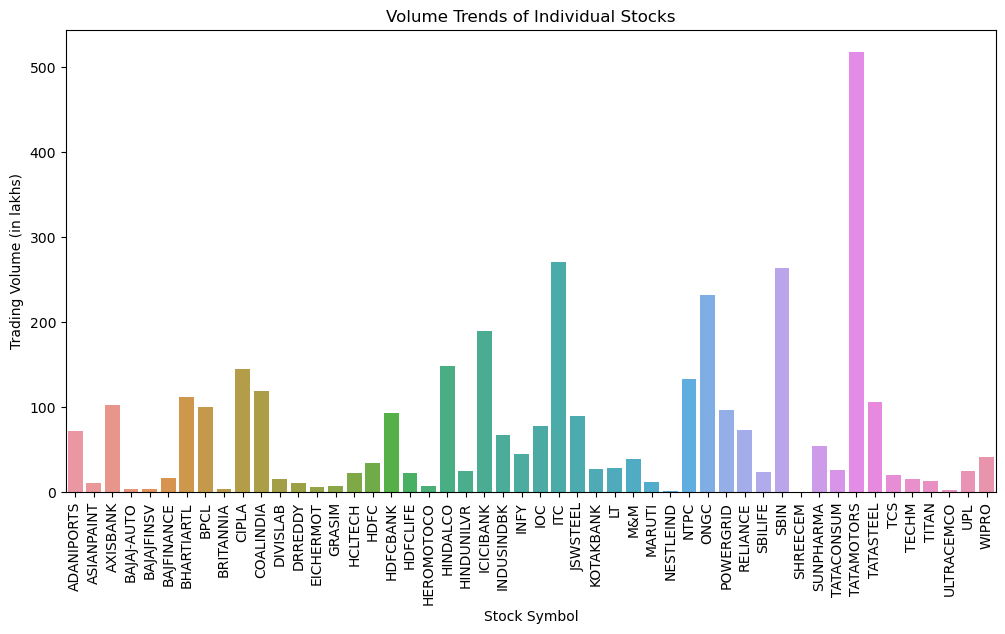

In [28]:

# Extract relevant columns
volume_data = nifty50[['symbol', 'volume_lacs']]

# Create a bar plot to visualize volume trends
plt.figure(figsize=(12, 6))
sns.barplot(data=volume_data, x='symbol', y='volume_lacs')
plt.xlabel('Stock Symbol')
plt.ylabel('Trading Volume (in lakhs)')
plt.title('Volume Trends of Individual Stocks')
plt.xticks(rotation=90)
plt.show()


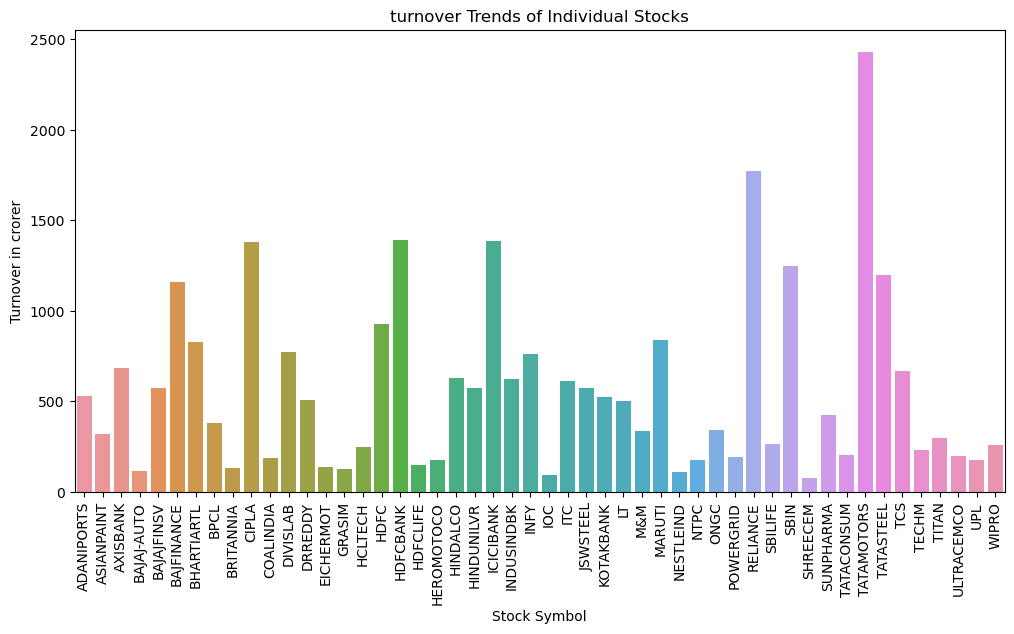

In [29]:
# Extract relevant columns
volume_data = nifty50[['symbol', 'turnover_cr']]

# Create a bar plot to visualize volume trends
plt.figure(figsize=(12, 6))
sns.barplot(data=volume_data, x='symbol', y='turnover_cr')
plt.xlabel('Stock Symbol')
plt.ylabel('Turnover in crorer')
plt.title('turnover Trends of Individual Stocks')
plt.xticks(rotation=90)
plt.show()

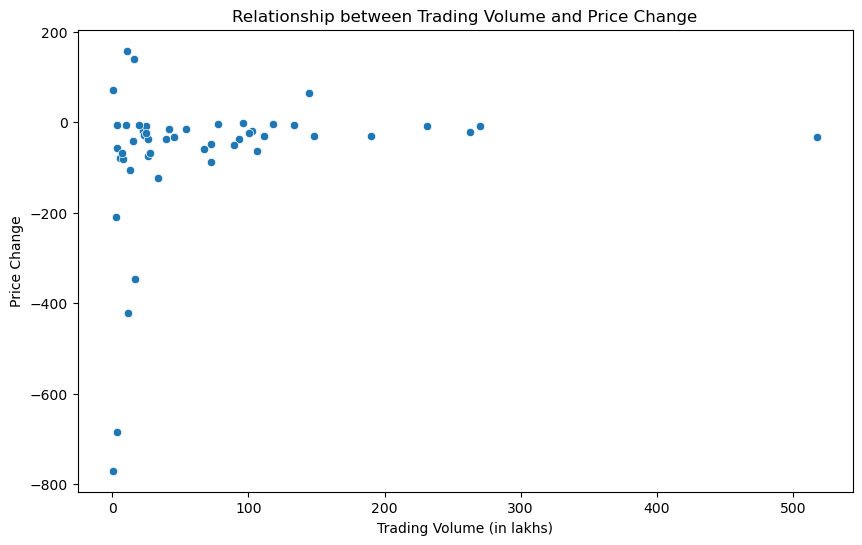

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant columns
volume_price_data = nifty50[['symbol', 'volume_lacs', 'chng']]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=volume_price_data, x='volume_lacs', y='chng')
plt.xlabel('Trading Volume (in lakhs)')
plt.ylabel('Price Change')
plt.title('Relationship between Trading Volume and Price Change')
plt.show()


In [31]:
# Financial Performance Analysis
financial_data = nifty50[['symbol', 'open', 'high', 'low', 'ltp']]
top5_financial_data = financial_data[financial_data['symbol'].isin(nifty50_ranked['symbol'])]
print(top5_financial_data)

# Turnover Analysis
turnover_data = nifty50[['symbol', 'turnover_cr']]
top5_turnover_data = turnover_data[turnover_data['symbol'].isin(nifty50_ranked['symbol'])]
print(top5_turnover_data)

# Additional Analysis
# You can perform technical analysis or explore additional indicators to assess momentum, volatility, and potential future performance of the stocks.

# Evaluation Framework
# Develop a comprehensive evaluation framework, assign weights to different factors, and calculate an overall score for each stock.

# Rank the Stocks
# Based on the evaluation framework and your criteria, rank the top 5 stocks to identify the best Nifty 50 stock for your investment strategy.


        symbol      open      high       low       ltp
0   ADANIPORTS    750.00    766.00    713.25    715.00
1   ASIANPAINT   3101.00   3167.35   3091.00   3138.00
2     AXISBANK    669.00    674.90    660.45    661.00
3   BAJAJ-AUTO   3370.00   3383.50   3320.00   3335.00
4   BAJAJFINSV  17200.00  17237.20  16610.00  16684.00
5   BAJFINANCE   7021.00   7047.90   6775.00   6780.00
6   BHARTIARTL    763.00    763.00    733.10    735.85
7         BPCL    397.15    397.20    375.00    377.40
8    BRITANNIA   3560.00   3635.10   3533.95   3566.60
9        CIPLA    892.00    976.05    890.65    965.00
10   COALINDIA    157.75    159.40    155.35    155.90
11    DIVISLAB   4770.00   5077.70   4756.75   4940.00
12     DRREDDY   4580.00   4820.00   4576.15   4750.00
13   EICHERMOT   2495.00   2506.10   2421.50   2440.75
14      GRASIM   1757.30   1757.85   1679.00   1685.80
15     HCLTECH   1120.00   1126.00   1103.30   1111.65
16        HDFC   2820.35   2856.00   2723.00   2745.00
17    HDFC

## Volatility  Analysis

In [32]:
nifty50['volatility'] = nifty50['high'] - nifty50['low']
nifty50.head()

,symbol,open,high,low,ltp,chng,%chng,volume_lacs,turnover_cr,52week_high,52week_low,%change_365days,%change_30days,volatility
0,ADANIPORTS,750.0,766.00,713.25,715.0,-47.45,-6.22,72.20,532.63,901.0,384.40,79.22,-4.65,52.75
1,ASIANPAINT,3101.0,3167.35,3091.00,3138.0,-6.25,-0.20,10.29,322.53,3505.0,2117.15,45.66,5.66,76.35
2,AXISBANK,669.0,674.90,660.45,661.0,-18.90,-2.78,102.53,684.00,866.9,568.40,10.19,-21.49,14.45
3,BAJAJ-AUTO,3370.0,3383.50,3320.00,3335.0,-56.70,-1.67,3.42,114.59,4361.4,3041.00,9.30,-12.05,63.50
4,BAJAJFINSV,17200.0,17237.20,16610.00,16684.0,-684.85,-3.94,3.42,576.79,19325.0,8273.70,91.38,-9.10,627.20


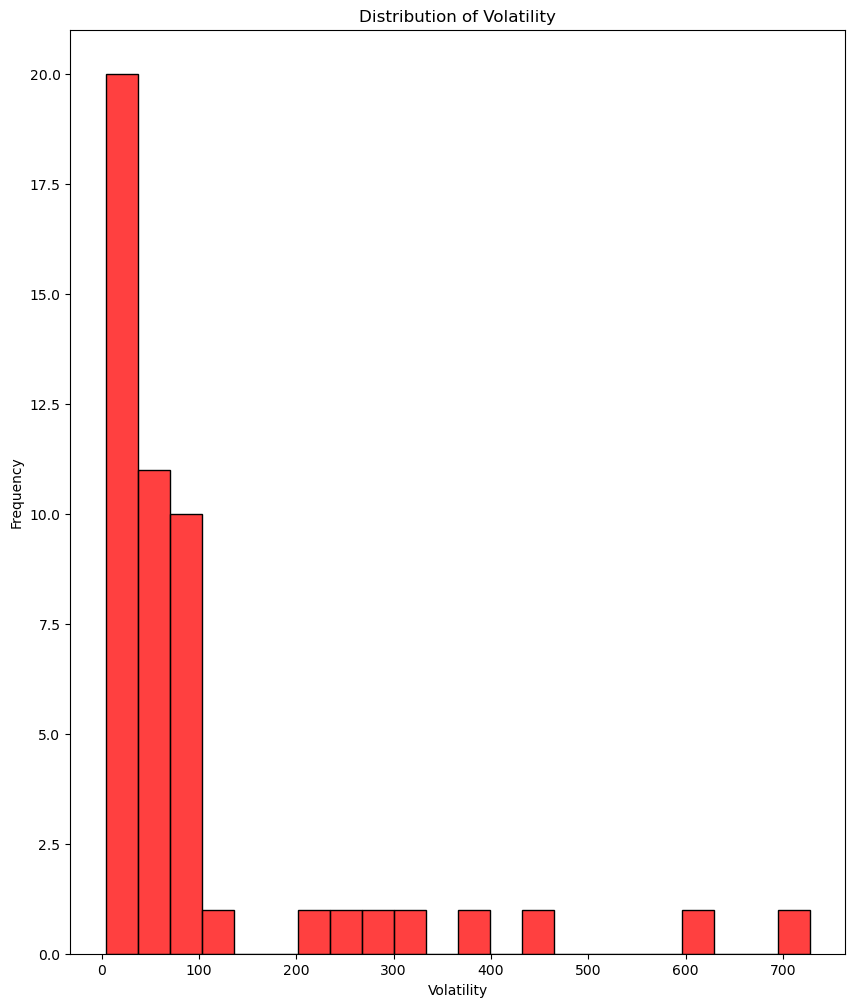

In [33]:
plt.figure(figsize = (10, 12))
sns.histplot(nifty50['volatility'],color = 'red', edgecolor = 'black')
plt.title('Distribution of Volatility')
plt.ylabel('Frequency')
plt.xlabel('Volatility')
plt.show()

### Volatility vs Volume

<Figure size 1200x1200 with 0 Axes>

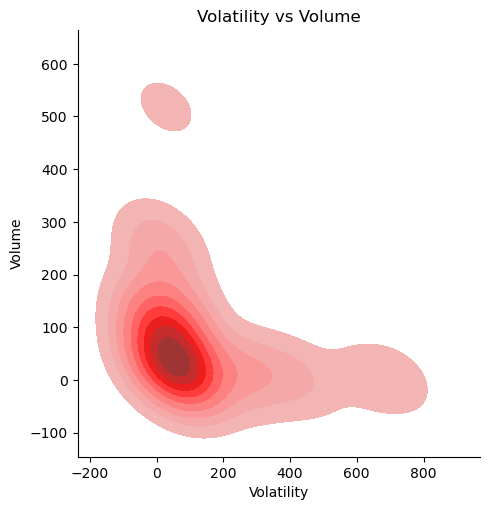

In [34]:
plt.figure(figsize = (12, 12))
sns.displot(data = nifty50, x = 'volatility', y = 'volume_lacs',color = 'red', kind = 'kde', fill = True)
plt.title('Volatility vs Volume')
plt.ylabel('Volume')
plt.xlabel('Volatility')
plt.show()

The displot, shows that volatility of a stock does not directly depend on the volume of a stock, and overall it has a sligthly negative correlation.

We can observe, that while for some stocks, which had low volume, they were also less volatile, but at the same time, some stocks with low volume had very high volatility and some with high volume had very low volatilty. 

We can make a conclusion that volume and volatility are not directly related, and other factors like turnover or price change should be evaluated


### Volatility vs Turnover

<Figure size 1200x1200 with 0 Axes>

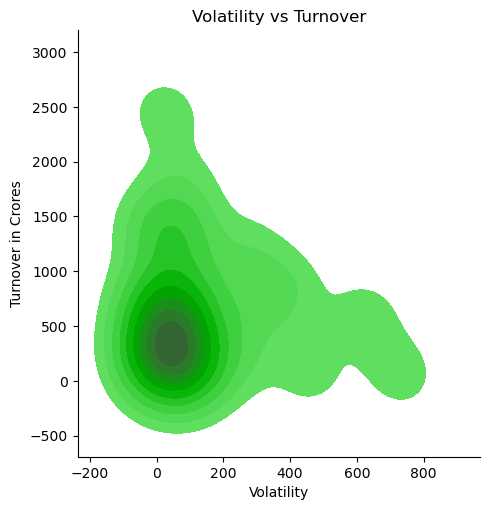

In [35]:
plt.figure(figsize = (12, 12))
sns.displot(data = nifty50, x = 'volatility', y = 'turnover_cr',color = 'green', kind = 'kde', fill = True)
plt.title('Volatility vs Turnover')
plt.ylabel('Turnover in Crores')
plt.xlabel('Volatility')
plt.show()

### Volatility vs Price Change

<Figure size 1200x1200 with 0 Axes>

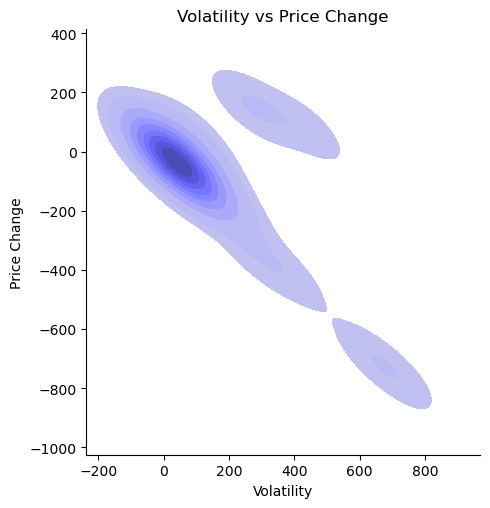

In [36]:
plt.figure(figsize = (12, 12))
sns.displot(data = nifty50, x = 'volatility', y = 'chng',color = 'blue', kind = 'kde', fill = True)
plt.title('Volatility vs Price Change')
plt.ylabel('Price Change')
plt.xlabel('Volatility')
plt.show()

The displot, for the Volatility vs Price Change, indicates that, the more negative the price change the greater the volatility, also supported by their correltion variable with is -0.737, 

So we can definately make the conclusion that stocks which have higher negative percentage change, tend to have a high volatility, and these stocks should be traded very carefully and rather avoided.

In [37]:
volatility_volume = nifty50['volatility'].corr(nifty50['volume_lacs'])
print(volatility_volume)

-0.34481585523911923


In [38]:
volatility_turnover = nifty50['volatility'].corr(nifty50['turnover_cr'])
print(volatility_turnover)

-0.0778674289496271


In [39]:
volatility_pchange = nifty50['volatility'].corr(nifty50['chng'])
print(volatility_pchange)

-0.737274766452131


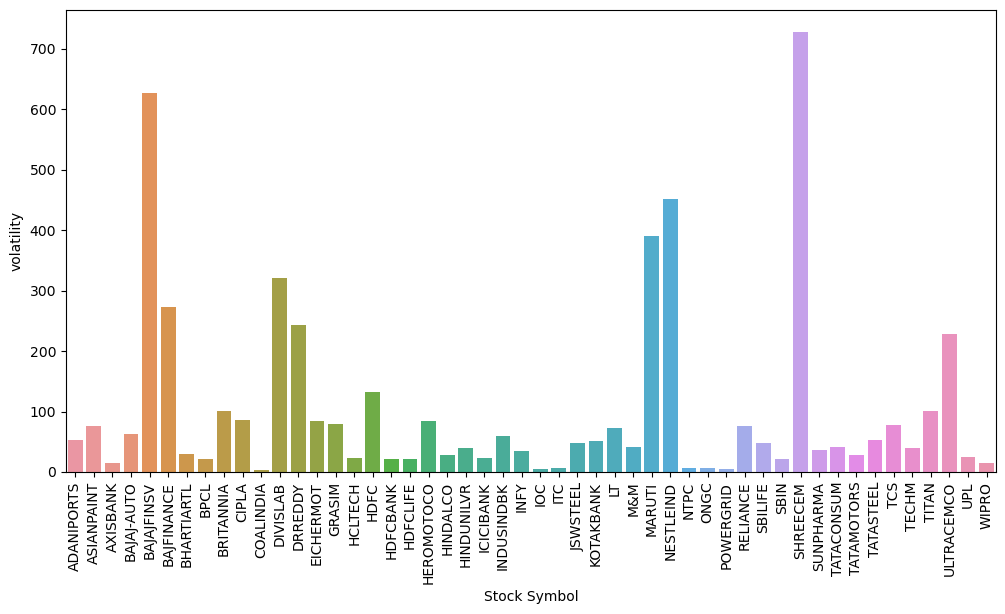

In [40]:
volume_data = nifty50[['symbol', 'volatility']]

# Create a bar plot to visualize volume trends
plt.figure(figsize=(12, 6))
sns.barplot(data=volume_data, x='symbol', y='volatility')
plt.xlabel('Stock Symbol')
plt.ylabel('volatility')
plt.title('')
plt.xticks(rotation=90)
plt.show()

## Sectoral Analysis

Let's analyse the NIFTY50 stocks, according to sector to understand, which sectors tend to perform the best over the course of the year


The nifty 50 Stocks are divided into 14 sectors, with different weightages, but for our analysis, we will analyse only the top 3 most weighted sectors

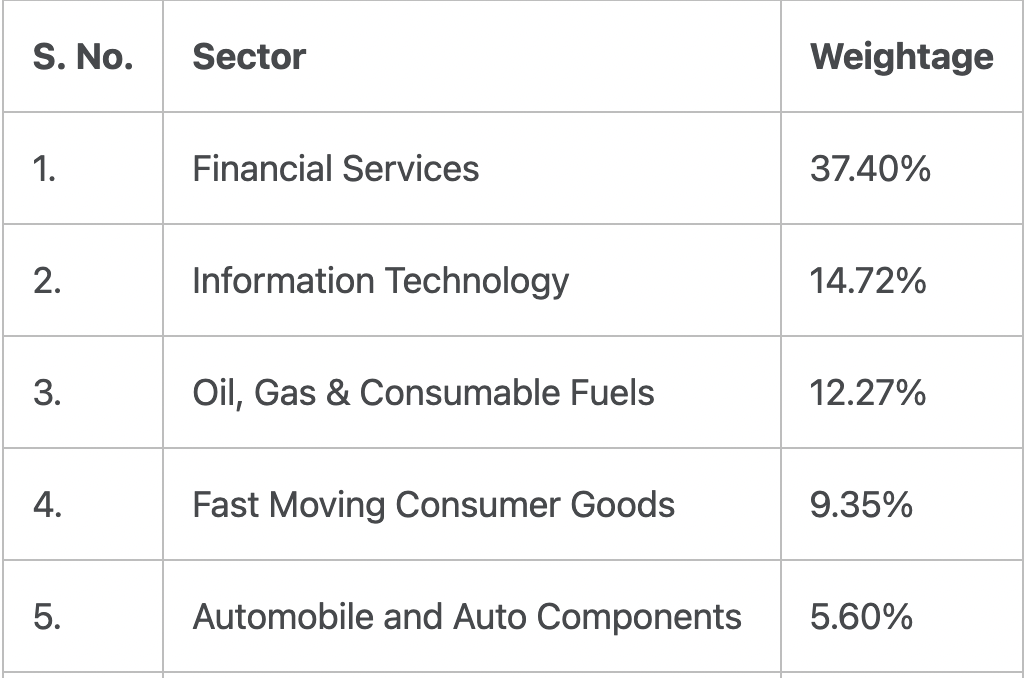

In [41]:
nifty50['symbol']

0     ADANIPORTS
1     ASIANPAINT
2       AXISBANK
3     BAJAJ-AUTO
4     BAJAJFINSV
5     BAJFINANCE
6     BHARTIARTL
7           BPCL
8      BRITANNIA
9          CIPLA
10     COALINDIA
11      DIVISLAB
12       DRREDDY
13     EICHERMOT
14        GRASIM
15       HCLTECH
16          HDFC
17      HDFCBANK
18      HDFCLIFE
19    HEROMOTOCO
20      HINDALCO
21    HINDUNILVR
22     ICICIBANK
23    INDUSINDBK
24          INFY
25           IOC
26           ITC
27      JSWSTEEL
28     KOTAKBANK
29            LT
30           M&M
31        MARUTI
32     NESTLEIND
33          NTPC
34          ONGC
35     POWERGRID
36      RELIANCE
37       SBILIFE
38          SBIN
39      SHREECEM
40     SUNPHARMA
41    TATACONSUM
42    TATAMOTORS
43     TATASTEEL
44           TCS
45         TECHM
46         TITAN
47    ULTRACEMCO
48           UPL
49         WIPRO
Name: symbol, dtype: object

In [42]:
finance_stocks = ['AXISBANK', 'BAJFINANCE', 'BAJAJFINSV', 'ICICIBANK', 'HDFCLIFE', 'HDFCBANK', 'HDFC', 'SBILIFE', 'KOTAKBANK']

finance_df = nifty50['symbol'].isin(finance_stocks)
finance_table = nifty50[finance_df].pivot_table(values =['open','high','low','ltp','chng','volume_lacs','52week_high','52week_low','turnover_cr','%change_365days','%change_30days'], index= ['symbol'])
finance_table.reset_index( inplace=True)
finance_table

,symbol,%change_30days,%change_365days,52week_high,52week_low,chng,high,low,ltp,open,turnover_cr,volume_lacs
0,AXISBANK,-21.49,10.19,866.90,568.4,-18.90,674.90,660.45,661.00,669.00,684.00,102.53
1,BAJAJFINSV,-9.10,91.38,19325.00,8273.7,-684.85,17237.20,16610.00,16684.00,17200.00,576.79,3.42
2,BAJFINANCE,-13.69,44.57,8050.00,4362.0,-345.80,7047.90,6775.00,6780.00,7021.00,1161.63,16.89
3,HDFC,-5.72,25.27,3021.10,2179.3,-122.75,2856.00,2723.00,2745.00,2820.35,927.88,33.53
4,HDFCBANK,-9.88,6.18,1725.00,1342.0,-36.45,1506.70,1485.00,1489.50,1500.00,1394.10,93.12
5,HDFCLIFE,-2.94,0.70,775.65,617.4,-19.05,689.00,667.10,669.75,685.00,151.40,22.37
6,ICICIBANK,-13.14,52.41,867.00,465.8,-30.60,742.05,718.60,720.45,739.00,1385.86,189.88
7,KOTAKBANK,-11.35,5.24,2253.00,1626.0,-75.10,2007.00,1955.10,1960.00,2002.00,522.52,26.48
8,SBILIFE,-3.52,33.19,1273.90,825.2,-28.65,1154.00,1105.25,1130.85,1154.00,262.43,23.16


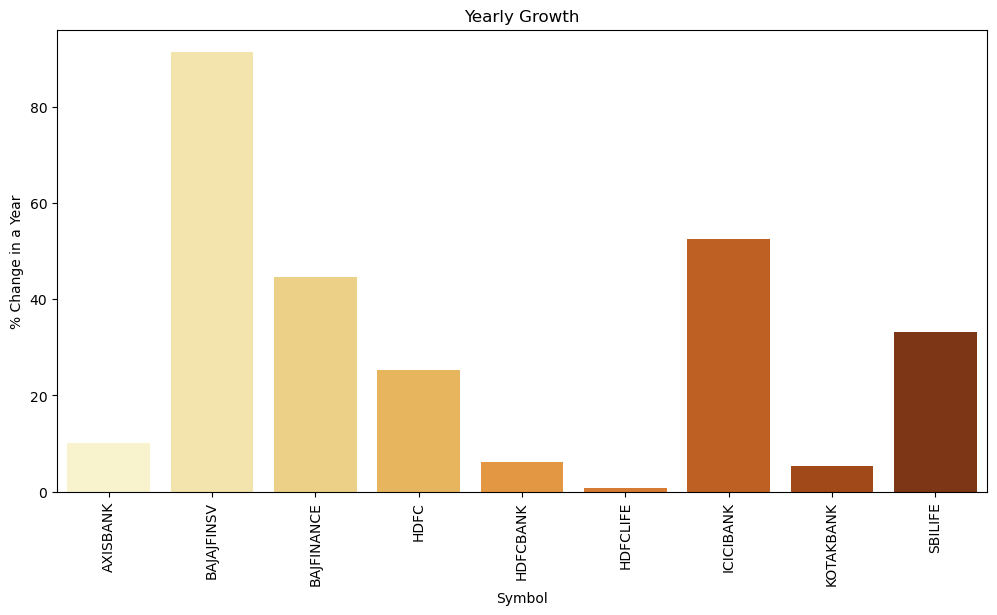

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data = finance_table, x = 'symbol', y = '%change_365days', palette = 'YlOrBr')
plt.xlabel("Symbol")  
plt.ylabel('% Change in a Year')  
plt.title("Yearly Growth")  
plt.xticks(rotation=90)
plt.show()

The bar plot indicates, that over the course of 1 year, the finance sector had a positive change in price

and stocks like `BAJAJFINSV`, `BAJAJFINANCE` and `ICICIBANK` had very high positive percent change, and could be considered as good stock to invest in the FINANCE sector of the NIFTY 50 Index

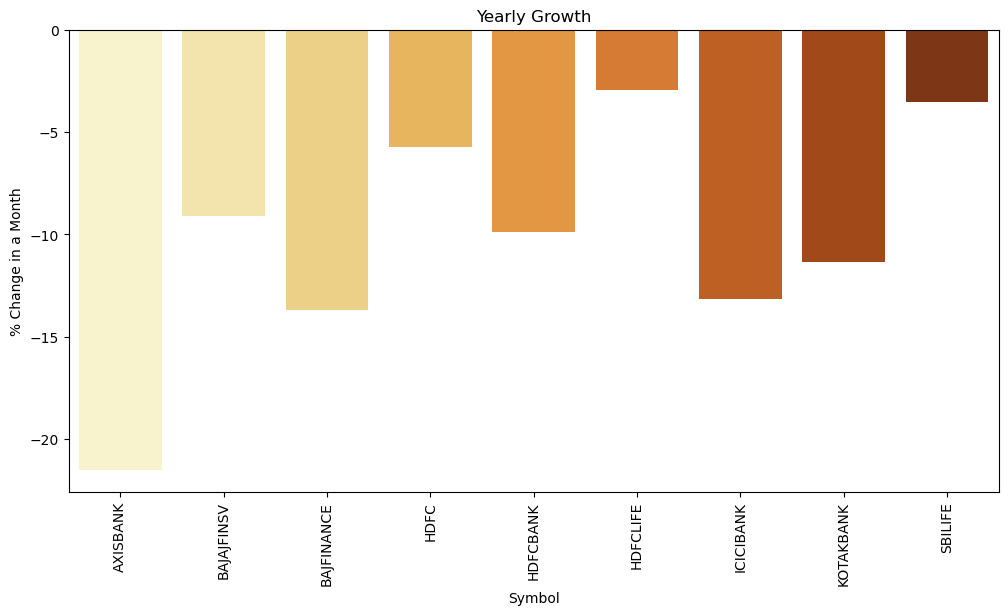

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data = finance_table, x = 'symbol', y = '%change_30days', palette = 'YlOrBr')
plt.xlabel("Symbol")  
plt.ylabel('% Change in a Month')  
plt.title("Yearly Growth")  
plt.xticks(rotation=90)
plt.show()

Whereas, in the month period, the finance sector did not perform positively, a trend the whole NIFTY50 index follows

### Information Technology Stocks

In [45]:
IT_stocks = ['COFORGE', 'HCLTECH', 'INFY', 'LTI', 'LTTS', 'MINDTREE', 'MPHASIS', 'TCS', 'TECHM', 'WIPRO']

IT_df = nifty50['symbol'].isin(IT_stocks)
IT_table = nifty50[IT_df].pivot_table(values =['open','high','low','ltp','chng','volume_lacs','52week_high','52week_low','turnover_cr','%change_365days','%change_30days'], index= ['symbol'])
IT_table.reset_index( inplace=True)
IT_table

,symbol,%change_30days,%change_365days,52week_high,52week_low,chng,high,low,ltp,open,turnover_cr,volume_lacs
0,HCLTECH,-4.73,34.79,1377.75,814.35,-13.15,1126.00,1103.30,1111.65,1120.00,246.06,22.07
1,INFY,-0.83,51.44,1848.00,1091.00,-32.85,1718.35,1684.00,1689.55,1702.55,764.67,44.94
2,TCS,-1.25,27.32,3989.90,2624.45,-6.70,3490.00,3411.90,3439.20,3425.00,670.58,19.41
3,TECHM,-2.83,76.17,1630.00,846.70,-40.35,1550.00,1510.15,1519.00,1544.00,232.97,15.22
4,WIPRO,-7.01,77.51,739.85,346.25,-15.40,634.40,619.65,621.30,632.00,259.37,41.39


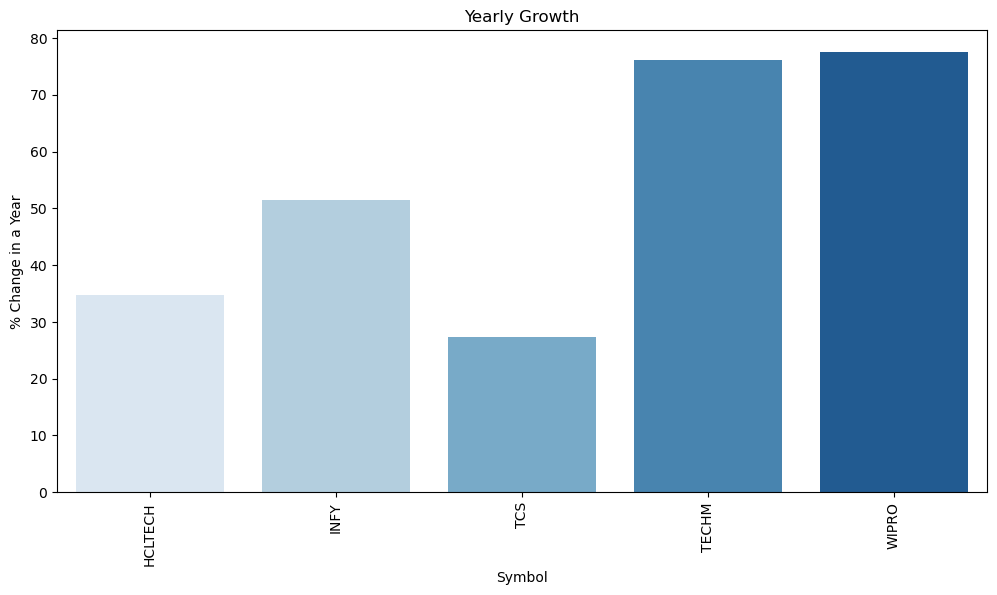

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data = IT_table, x = 'symbol', y = '%change_365days', palette = 'Blues')
plt.xlabel("Symbol")  
plt.ylabel('% Change in a Year')  
plt.title("Yearly Growth")  
plt.xticks(rotation=90)
plt.show()

The IT sector also performed positively, with stocks like `WIPRO`, `TECHM` and `INFY` having more than positive 50 percent change over the period of a year, and could be considered as good stocks worth investing in

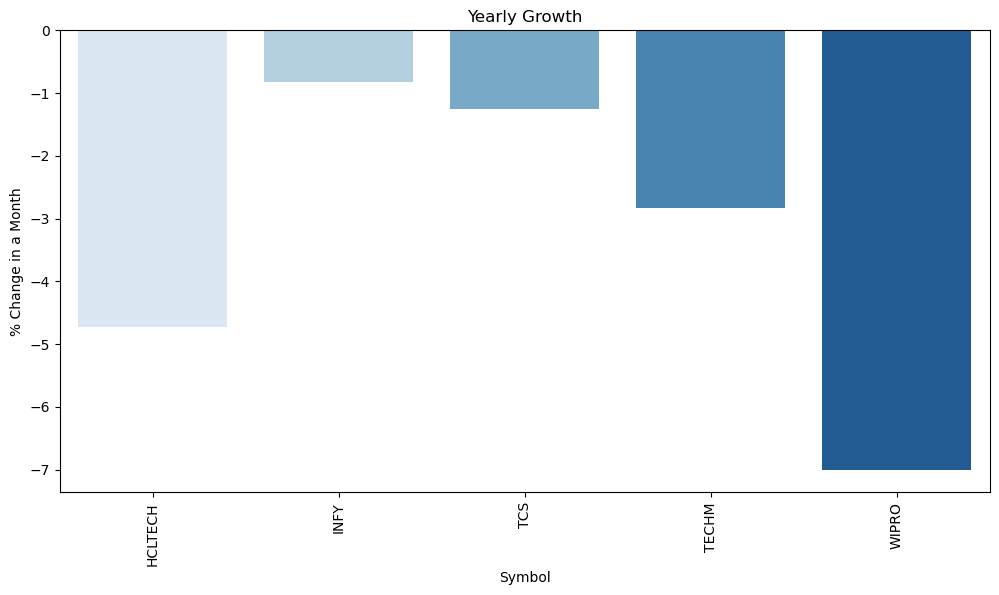

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data = IT_table, x = 'symbol', y = '%change_30days', palette = 'Blues')
plt.xlabel("Symbol")  
plt.ylabel('% Change in a Month')  
plt.title("Yearly Growth")  
plt.xticks(rotation=90)
plt.show()

The IT stocks also followed a similar trend as the Finance sector and the NIFTY50 index as whole, and had negative price change over the period of a month

# Final Analysis and Conclusion

**Final Conclusion**

In this analysis of the Nifty 50 stock dataset, we explored various aspects of the stocks to gain insights into the factors influencing stock price changes. Through the process of exploratory data analysis (EDA) and visualization, we uncovered valuable information and patterns within the dataset.

- **The univariate analysis** provided an overview of the distribution and characteristics of individual variables such as stock prices, trading volume, turnover, and percentage changes over different time periods.We found some skewness in the data and the presence of some outliers and were able to generate some hypothesis regarding the relationships of the variables.We observed variations and trends in these variables, highlighting the diversity and dynamics within the Nifty 50 stocks.

- **The bivariate analysis**, including scatterplots, heatmap, barplots, pairplot and correlation analysis, allowed us to explore the relationships between variables. We observed mixed relationships between price changes and variables like trading volume, turnover, and percentage changes over different time periods. These findings suggest that while certain variables may have some influence on stock price changes, they may not always be reliable indicators for all stocks. Analysing price change over the period of 1 month and 1 year, provided us a lot of valuable information, regarding the performance of the NIFTY 50 index over those periods. By ranking the stocks based on percentage change in price over a specific time period, we identified the top-performing stocks within the Nifty 50. Further analysis of these stocks can provide valuable insights into the factors driving their performance and profitability.

- Furthermore, the **volatility analysis** provided insights into the variability and fluctuation in stock prices by calculating the difference between high and low prices. We examined the relationship between volatility and other variables such as trading volume, turnover, and price changes. This analysis shed light on the potential connections between volatility and these variables.


- In addition to the comprehensive analysis of the Nifty 50 stocks, we also conducted a **sectoral analysis** to gain deeper insights into the performance of stocks within specific sectors. This analysis provided a closer look at the individual sectors and their contributions to the overall performance of the Nifty 50. Through the sectoral analysis, we identified the top-performing sectors based on factors such as price changes, turnover, and trading volume. This analysis allowed us to understand the relative strengths and weaknesses of different sectors within the Nifty 50.

**Conclusion**
in conclusion, this comprehensive analysis of the Nifty 50 stocks, provides valuable insights into the factors influencing stock price changes and the performance of different sectors.

However, it is crucial to note that investing in the stock market carries inherent risks, and past performance may not necessarily guarantee future results. Regular monitoring, staying updated with market trends, and seeking professional advice are essential for successful investing.

By leveraging the findings and insights from this analysis, investors can make more informed decisions, optimize their investment strategies, and strive for long-term growth and profitability.




